In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NNt1 = pd.read_excel('./target_decoy/HEK/TPRR_target.xlsx')
NNt1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.336,0.0113,[2],0,0.330,86,0.101,...,-1,0,0,(),Normal,Unk,Unk,0,314352814,NaN
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,LAAFGQLHK/3,0.196,0.0110,[2],0,-0.002,44,0.077,...,-1,0,0,(),Normal,Unk,Unk,0,267343279,NaN
2,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,RRPENPKPQDGK/4,0.470,0.3080,[2],0,-0.001,7,0.147,...,-1,0,0,(),Normal,Unk,Unk,0,413114683,NaN
3,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.600,0.3030,[2],0,-0.002,102,0.097,...,-1,0,0,(),Normal,Unk,Unk,0,413113222,NaN
4,b1906_293T_proteinID_01A_QE3_122212.01909.01909.3,1,HGGYKPSDEHK/3,0.601,0.2820,[2],0,-0.003,32,0.091,...,-1,0,0,(),Normal,Unk,Unk,0,190444949,NaN


In [3]:
NNd1 = pd.read_excel('./target_decoy/HEK/TPRR_decoy.xlsx')
NNd1.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,AEIHAC[160]K/2,0.223,0.025,[2],0,0.008,35,0.062,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,579600070
1,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,MTGPFDQGHK/2,0.283,0.001,[2],0,0.007,57,0.070,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,654789623
2,b1906_293T_proteinID_01A_QE3_122212.01927.01927.3,1,FDLHEILVYGYK/3,0.236,0.016,[2],0,-0.001,105,0.074,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,838139973
3,b1906_293T_proteinID_01A_QE3_122212.01934.01934.3,1,KHSEEHSE/3,0.178,0.044,[2],0,0.327,4,0.109,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,778535063
4,b1906_293T_proteinID_01A_QE3_122212.01937.01937.3,1,EVDQTLLQDPNAIK/3,0.248,0.020,[2],0,-0.007,79,0.076,...,-1,0,0,(),Normal,Unk,Unk,1,XXX,662518868


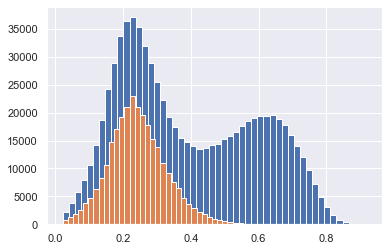

In [4]:
nnt1 = plt.hist(NNt1['Dot'], bins = 50)
nnd1 = plt.hist(NNd1['Dot'], bins = 50)

0.01798
0.015220000000000001


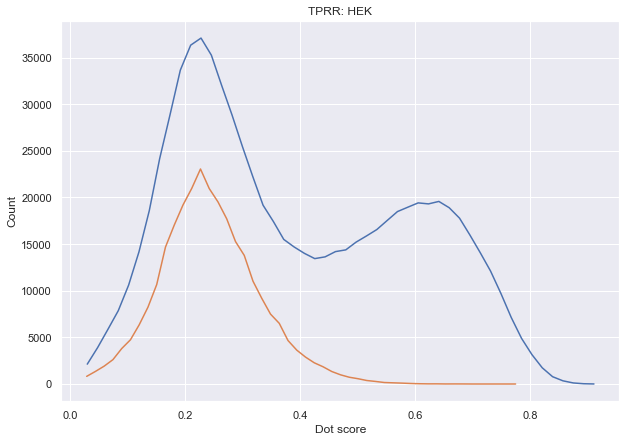

In [9]:
print(nnt1[1][1] - nnt1[1][0])
print(nnd1[1][1] - nnd1[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('Dot score')
plt.ylabel('Count')
plt.title('TPRR: HEK')
plt.plot(nnt1[1][:-1] + 0.0085, nnt1[0])
plt.plot(nnd1[1][:-1] + 0.0075, nnd1[0])
plt.show()

In [6]:
print(len(NNt1))
print(len(NNd1))

771077
276921


In [7]:
score = 0

for i in range(0, 1000):
    score += 0.001
    print('score: ' , score)
    
    nntarget = NNt1['Dot'] >= score
    nnt = NNt1[nntarget]
    
    nndecoy = NNd1['Dot'] >= score
    nnd = NNd1[nndecoy]
    
    print('nnt: ', len(nnt))
    print('nnd: ', len(nnd))
    print('FDR: ', len(nnd) / len(nnt))
    print('\n')
    
    if (len(nnd) / len(nnt)) <= 0.01:
        print(len(nnd))
        print(len(nnt))
        print(len(nnd) / len(nnt))
        print(score)
        break
"""
결과
score:  0.47200000000000036
nnt:  280532
nnd:  2766
FDR:  0.009859837736871373
"""

score:  0.001
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.002
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.003
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.004
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.005
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.006
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.007
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.008
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.009000000000000001
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.010000000000000002
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.011000000000000003
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.012000000000000004
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.013000000000000005
nnt:  771077
nnd:  276921
FDR:  0.35913533927221275


score:  0.014000000000000005
nnt:  771077

nnt:  745231
nnd:  264705
FDR:  0.35519858943065974


score:  0.10400000000000008
nnt:  744616
nnd:  264394
FDR:  0.35507429332703033


score:  0.10500000000000008
nnt:  743989
nnd:  264087
FDR:  0.3549608932390129


score:  0.10600000000000008
nnt:  743347
nnd:  263758
FDR:  0.35482486644864375


score:  0.10700000000000008
nnt:  742683
nnd:  263409
FDR:  0.3546721818056964


score:  0.10800000000000008
nnt:  742071
nnd:  263089
FDR:  0.3545334610839125


score:  0.10900000000000008
nnt:  741398
nnd:  262727
FDR:  0.35436702014302707


score:  0.11000000000000008
nnt:  740720
nnd:  262370
FDR:  0.3542094178637002


score:  0.11100000000000008
nnt:  739995
nnd:  262013
FDR:  0.3540740140136082


score:  0.11200000000000009
nnt:  739278
nnd:  261681
FDR:  0.3539683312637465


score:  0.11300000000000009
nnt:  738569
nnd:  261341
FDR:  0.3538477786097169


score:  0.11400000000000009
nnt:  737810
nnd:  260944
FDR:  0.35367371003374853


score:  0.11500000000000009
nnt:  737086
nnd:  2605

nnt:  611420
nnd:  182782
FDR:  0.29894671420627394


score:  0.20600000000000016
nnt:  609420
nnd:  181415
FDR:  0.2976846837977093


score:  0.20700000000000016
nnt:  607498
nnd:  180034
FDR:  0.29635323902300914


score:  0.20800000000000016
nnt:  605406
nnd:  178654
FDR:  0.295097835171769


score:  0.20900000000000016
nnt:  603425
nnd:  177213
FDR:  0.2936785847454116


score:  0.21000000000000016
nnt:  601350
nnd:  175779
FDR:  0.29230730855574955


score:  0.21100000000000016
nnt:  599331
nnd:  174412
FDR:  0.2910111440923296


score:  0.21200000000000016
nnt:  597295
nnd:  172980
FDR:  0.2896056387547192


score:  0.21300000000000016
nnt:  595309
nnd:  171558
FDR:  0.2881831116277429


score:  0.21400000000000016
nnt:  593251
nnd:  170188
FDR:  0.2868735155945797


score:  0.21500000000000016
nnt:  591196
nnd:  168795
FDR:  0.28551444867691933


score:  0.21600000000000016
nnt:  589128
nnd:  167401
FDR:  0.28415047324180825


score:  0.21700000000000016
nnt:  587041
nnd:  16604

nnt:  427670
nnd:  56689
FDR:  0.13255313676432764


score:  0.3080000000000002
nnt:  426336
nnd:  55856
FDR:  0.1310140358778053


score:  0.3090000000000002
nnt:  424994
nnd:  55105
FDR:  0.1296606540327628


score:  0.3100000000000002
nnt:  423722
nnd:  54286
FDR:  0.12811702012168355


score:  0.3110000000000002
nnt:  422392
nnd:  53469
FDR:  0.12658620428417205


score:  0.3120000000000002
nnt:  421146
nnd:  52640
FDR:  0.12499228296125334


score:  0.3130000000000002
nnt:  419894
nnd:  51880
FDR:  0.12355499245047559


score:  0.3140000000000002
nnt:  418603
nnd:  51076
FDR:  0.1220153701717379


score:  0.3150000000000002
nnt:  417325
nnd:  50330
FDR:  0.12060144970945906


score:  0.3160000000000002
nnt:  416040
nnd:  49625
FDR:  0.1192793962119027


score:  0.3170000000000002
nnt:  414796
nnd:  48870
FDR:  0.11781695098313388


score:  0.3180000000000002
nnt:  413529
nnd:  48135
FDR:  0.11640054264634403


score:  0.31900000000000023
nnt:  412338
nnd:  47452
FDR:  0.1150803467

nnt:  327911
nnd:  9925
FDR:  0.03026735913098371


score:  0.4110000000000003
nnt:  327142
nnd:  9746
FDR:  0.029791344431470128


score:  0.4120000000000003
nnt:  326368
nnd:  9586
FDR:  0.029371752132562014


score:  0.4130000000000003
nnt:  325610
nnd:  9386
FDR:  0.028825896010564785


score:  0.4140000000000003
nnt:  324839
nnd:  9219
FDR:  0.028380212967039055


score:  0.4150000000000003
nnt:  324084
nnd:  9063
FDR:  0.027964972044284817


score:  0.4160000000000003
nnt:  323292
nnd:  8907
FDR:  0.02755094465684273


score:  0.4170000000000003
nnt:  322578
nnd:  8720
FDR:  0.02703222166421765


score:  0.4180000000000003
nnt:  321812
nnd:  8550
FDR:  0.026568306961828644


score:  0.4190000000000003
nnt:  321045
nnd:  8405
FDR:  0.02618013051129904


score:  0.4200000000000003
nnt:  320254
nnd:  8259
FDR:  0.025788905056611314


score:  0.4210000000000003
nnt:  319540
nnd:  8098
FDR:  0.025342680102647556


score:  0.4220000000000003
nnt:  318835
nnd:  7950
FDR:  0.024934527263

'\n결과\nscore:  0.5000000000000003\nnnt:  276928\nnnd:  2745\nFDR:  0.00991232378091056\n'